In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv(r"..\data\train.csv")
test = pd.read_csv(r"..\data\test.csv")

In [3]:
X = train.drop(columns = ["label"])
y = train.loc[:, "label"]

In [4]:
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

In [5]:
num_classes = 10

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

In [7]:
X_train_padded = tf.reshape(X_train, (-1, 28, 28))
X_train_padded = tf.pad(X_train_padded, paddings=[[0, 0], [2, 2], [2, 2]])

In [8]:
X_valid_padded = tf.reshape(X_valid, (-1, 28, 28))
X_valid_padded = tf.pad(X_valid_padded, paddings=[[0, 0], [2, 2], [2, 2]])

In [9]:
X_train_padded = tf.expand_dims(X_train_padded, axis = -1)
X_valid_padded = tf.expand_dims(X_valid_padded, axis = -1)

In [10]:
X_train_rgb = tf.image.grayscale_to_rgb(X_train_padded)
x_valid_rgb = tf.image.grayscale_to_rgb(X_valid_padded)

In [11]:
pretrained_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [12]:
for layer in pretrained_model.layers:
    layer.trainable = False

In [13]:
x = Flatten()(pretrained_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

In [14]:
model = Model(inputs=pretrained_model.input, outputs=output)

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

In [17]:
history = model.fit(X_train_rgb, y_train,
                    validation_data=(x_valid_rgb, y_valid),
                    epochs=40,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/40
985/985 ━━━━━━━━━━━━━━━━━━━━ 148s 142ms/step - accuracy: 0.8239 - loss: 0.5790 - val_accuracy: 0.9192 - val_loss: 0.2588
Epoch 2/40
985/985 ━━━━━━━━━━━━━━━━━━━━ 142s 144ms/step - accuracy: 0.9253 - loss: 0.2295 - val_accuracy: 0.9219 - val_loss: 0.2395
Epoch 3/40
985/985 ━━━━━━━━━━━━━━━━━━━━ 139s 141ms/step - accuracy: 0.9372 - loss: 0.1873 - val_accuracy: 0.9330 - val_loss: 0.2048
Epoch 4/40
985/985 ━━━━━━━━━━━━━━━━━━━━ 142s 144ms/step - accuracy: 0.9442 - loss: 0.1670 - val_accuracy: 0.9370 - val_loss: 0.1894
Epoch 5/40
985/985 ━━━━━━━━━━━━━━━━━━━━ 181s 184ms/step - accuracy: 0.9464 - loss: 0.1589 - val_accuracy: 0.9430 - val_loss: 0.1868
Epoch 6/40
985/985 ━━━━━━━━━━━━━━━━━━━━ 133s 135ms/step - accuracy: 0.9560 - loss: 0.1337 - val_accuracy: 0.9448 - val_loss: 0.1921
Epoch 7/40
985/985 ━━━━━━━━━━━━━━━━━━━━ 134s 136ms/step - accuracy: 0.9540 - loss: 0.1373 - val_accuracy: 0.9397 - val_loss: 0.1901
Epoch 8/40
985/985 ━━━━━━━━━━━━━━━━━━━━ 155s 157ms/step - accuracy: 0.9634 -

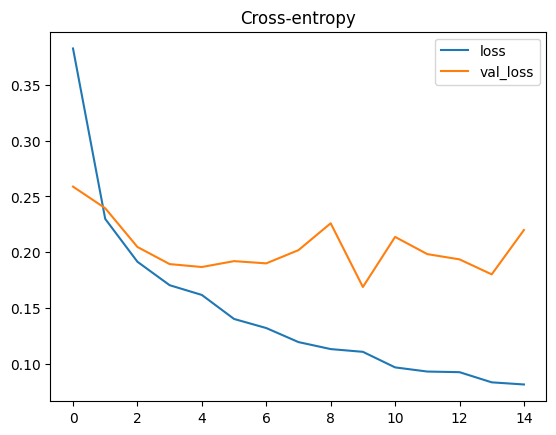

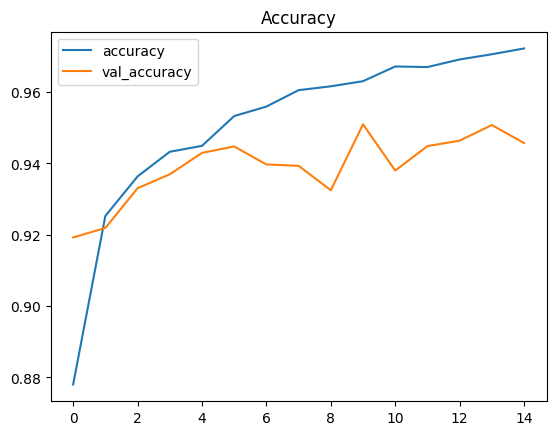

In [24]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy");

In [18]:
test_array = test.values

In [19]:
test_padded = tf.reshape(test_array, (-1, 28, 28))
test_padded = tf.pad(test_padded, paddings=[[0, 0], [2, 2], [2, 2]])
test_padded = tf.expand_dims(test_padded, axis = -1)
test_rgb = tf.image.grayscale_to_rgb(test_padded)

In [20]:
predictions = model.predict(test_rgb)

875/875 ━━━━━━━━━━━━━━━━━━━━ 111s 123ms/step


In [21]:
predicted_labels = np.argmax(predictions, axis=1)

In [22]:
my_submission3 = pd.DataFrame({'ImageId': range(1, 28001), 'Label': predicted_labels})
my_submission3.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [25]:
my_submission3.to_csv("../results/tensorflow3.csv", index=False)